### 3

In [2]:
!pip install scipy

  Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)


In [98]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [99]:
with open("spam.txt") as f:
    x = f.read()
    y = x.split()
    x = list(map(float, y))
    x = np.array(x)

In [100]:
x

array([ 6.,  4.,  0., 13.,  5.,  1.,  3., 10.,  1., 29., 12.,  4.,  4.,
       22.,  2.,  2., 27.,  7., 27.,  9., 34., 10., 10.,  2., 28.,  7.,
        0.,  9.,  4., 32.,  4.,  5.,  9.,  1., 13., 10., 20.,  5.,  5.,
        0.,  6.,  9., 20., 28., 22., 10.,  8., 11., 15.,  1., 14.,  0.,
        9.,  9.,  1.,  9.,  0.,  7., 13.])

(array([14., 11., 16.,  5.,  2.,  2.,  2.,  2.,  3.,  2.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 [<matplotlib.patches.Polygon at 0x210df68b730>])

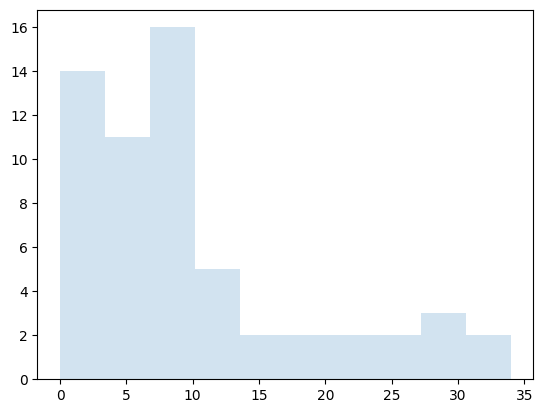

In [101]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, histtype='stepfilled', alpha=0.2)

In [102]:
lmb = 1 / np.mean(np.array(x))
a = np.mean(np.array(x))**2 / np.std(np.array(x)) # from course last part m1'**2 / m2'

# Determine the parameters for different distributions which may fit the data
stats.gamma.fit(np.array(x))

(0.4599757551997309, -2.6871056199772076e-26, 13.74313149802628)

In [103]:
# Basic test for KS ~ example
gamma_test = stats.kstest(
    rvs=x,
    cdf='gamma',
    args=(0.4599757551997309, -2.6871056199772076e-26, 13.74313149802628)
)

print("P-value {}".format(gamma_test.pvalue))

P-value 6.406630328381335e-07


### Finding the best distribution

- Based on the KS test find the best distribution that fits the current data
- Testing only for gamma, exponential and alpha distributions


In [104]:
dists = ["gamma", "alpha", "expon"]

In [114]:
for d in dists:
    print("\n \t Current test: {} \n".format(d))
    params = eval('stats.{}.fit(x)'.format(d))
    print("params: {}".format(params))
    test = stats.kstest(
        rvs=x,
        cdf=d,
        args=params
    )
    print("\n P-value {} \n".format(test.pvalue))


 	 Current test: gamma 

params: (0.4599757551997309, -2.6871056199772076e-26, 13.74313149802628)

 P-value 6.406630328381335e-07 


 	 Current test: alpha 

params: (3.2177535193095386, -14.171330515818644, 69.37675716420026)

 P-value 0.596464711083592 


 	 Current test: expon 

params: (0.0, 9.966101694915254)

 P-value 0.5231706968981257 



In [115]:
expon_data = stats.alpha.rvs(size=35, a=3.2177535193095386)

In [116]:
expon_data

array([0.2429142 , 0.38421794, 0.22025879, 0.32203025, 0.2934588 ,
       0.35419329, 0.25632802, 0.25333466, 0.25098735, 0.28787707,
       0.29090196, 0.34790179, 0.27899718, 0.31675204, 0.31054195,
       0.20861953, 0.21972761, 0.27907798, 0.219859  , 0.24048936,
       0.29426097, 0.84451981, 0.24960777, 0.29751168, 0.20623063,
       0.63663962, 0.30173721, 0.26079341, 0.20718712, 0.22997165,
       0.53603696, 0.25107389, 0.36212555, 0.29064137, 0.53320701])

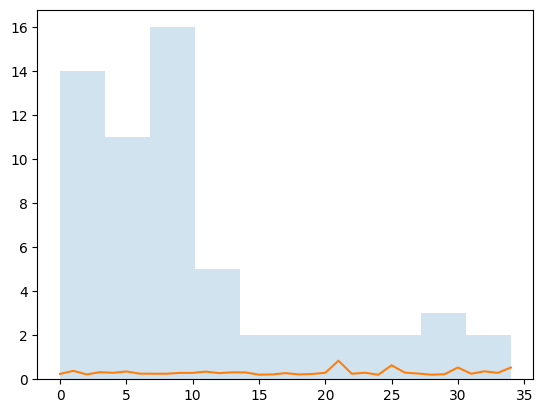

In [117]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, histtype='stepfilled', alpha=0.2)
ax.plot(expon_data)